### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as mtf

<br>

### Reading in Data

In [2]:
df_EI = pd.read_csv('data/EI.csv', parse_dates=['local_datetime'])
df_EI['local_datetime'] = pd.DatetimeIndex(pd.to_datetime(df_EI['local_datetime'], utc=True)).tz_convert('Europe/London')
df_EI = df_EI.set_index('local_datetime')
df_EI.head()

day_ahead_price  SP  imbalance_price  temperature  \
local_datetime                                                                 
2009-01-01 00:00:00+00:00            58.05   1            74.74         -0.6   
2009-01-01 00:30:00+00:00            56.33   2            74.89         -0.6   
2009-01-01 01:00:00+00:00            52.98   3            76.41         -0.6   
2009-01-01 01:30:00+00:00            50.39   4            37.73         -0.6   
2009-01-01 02:00:00+00:00            48.70   5            59.00         -0.6   

                           gCO2_per_kWh  TCO2_per_h  biomass    coal  demand  \
local_datetime                                                                 
2009-01-01 00:00:00+00:00         555.0     21278.0      0.0  17.650  38.329   
2009-01-01 00:30:00+00:00         558.0     21442.0      0.0  17.770  38.461   
2009-01-01 01:00:00+00:00         569.0     21614.0      0.0  18.070  37.986   
2009-01-01 01:30:00+00:00         578.0     21320.0      0.0  18.022  36.864   
2009-01-01 02:00:00+00:00         585.0     21160.0      0.0  17.998  36.180   

                              gas  ...  nuclear  pumped_storage  solar   wind  \
local_datetime                     ...                                          
2009-01-01 00:00:00+00:00  11.900  ...    6.973          -0.404    0.0  0.148   
2009-01-01 00:30:00+00:00  12.031  ...    6.968          -0.527    0.0  0.157   
2009-01-01 01:00:00+00:00  11.754  ...    6.970          -1.018    0.0  0.147   
2009-01-01 01:30:00+00:00  11.162  ...    6.969          -1.269    0.0  0.148   
2009-01-01 02:00:00+00:00  10.812  ...    6.960          -1.566    0.0  0.160   

                           dutch  french  irish  belgian  ireland  \
local_datetime                                                      
2009-01-01 00:00:00+00:00    0.0   1.977 -0.161      0.0      0.0   
2009-01-01 00:30:00+00:00    0.0   1.977 -0.160      0.0      0.0   
2009-01-01 01:00:00+00:00    0.0   1.977 -0.160      0.0      0.0   
2009-01-01 01:30:00+00:00    0.0   1.746 -0.160      0.0      0.0   
2009-01-01 02:00:00+00:00    0.0   1.730 -0.160      0.0      0.0   

                           northern_ireland  
local_datetime                               
2009-01-01 00:00:00+00:00               0.0  
2009-01-01 00:30:00+00:00               0.0  
2009-01-01 01:00:00+00:00               0.0  
2009-01-01 01:30:00+00:00               0.0  
2009-01-01 02:00:00+00:00               0.0  

[5 rows x 21 columns]

In [3]:
def rgb_2_plt_tuple(rgb_tuple):
    plt_tuple = tuple([x/255 for x in rgb_tuple])
    return plt_tuple

fuel_color_dict = {
    'Imports & Storage' : rgb_2_plt_tuple((121,68,149)), 
    'nuclear' : rgb_2_plt_tuple((77,157,87)), 
    'biomass' : rgb_2_plt_tuple((168,125,81)), 
    'gas' : rgb_2_plt_tuple((254,156,66)), 
    'coal' : rgb_2_plt_tuple((122,122,122)), 
    'hydro' : rgb_2_plt_tuple((50,120,196)), 
    'wind' : rgb_2_plt_tuple((72,194,227)), 
    'solar' : rgb_2_plt_tuple((255,219,65)),
              }

fuel_color_list = list(fuel_color_dict.values())

C:\Users\ABour\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


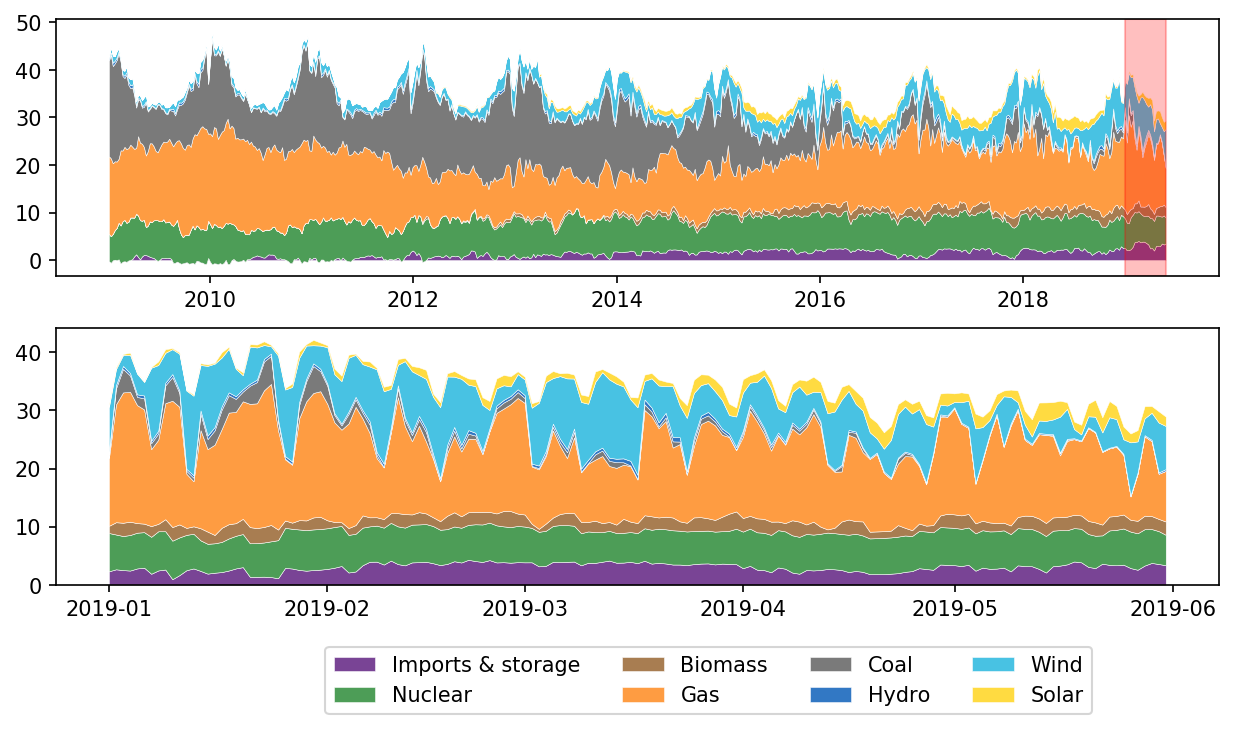

In [4]:
fuel_order = ['Imports & Storage', 'nuclear', 'biomass', 'gas', 'coal', 'hydro', 'wind', 'solar']
interconnectors = ['french', 'irish', 'dutch', 'belgian', 'ireland', 'northern_ireland']

df_EI_plot = (df_EI
              .copy()
              .assign(imports_storage=df_EI[interconnectors+['pumped_storage']].sum(axis=1))
              .rename(columns={'imports_storage':'Imports & Storage'})
              .drop(columns=interconnectors+['demand', 'pumped_storage'])
              [fuel_order]
             )

df_EI_week = df_EI_plot.resample('7D').mean()
df_EI_day = df_EI_plot.resample('D').mean()

## Plotting
fig = plt.figure(figsize=(10, 5), dpi=150)
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.stackplot(df_EI_week.index.values, df_EI_week.values.T, labels=df_EI_week.columns, linewidth=0.25, edgecolor='white', colors=fuel_color_list)
ax1.axvspan(df_EI_week['2019'].index.min(), df_EI_week['2019'].index.max(), color='red', alpha=0.25)

ax2.stackplot(df_EI_day['2019'].index.values, df_EI_day['2019'].values.T, labels=df_EI_day.columns.str.replace('_', ' ').str.capitalize(), linewidth=0.25, edgecolor='white', colors=fuel_color_list)
ax2.legend(ncol=4, bbox_to_anchor=(0.9, -0.2))

In [6]:
fig = plt.figure(figsize=(35, 5), dpi=1250)
ax = plt.subplot()

ax.stackplot(df_EI_week.index.values, df_EI_week.values.T, labels=df_EI_week.columns.str.capitalize(), linewidth=0.1, edgecolor='white', colors=fuel_color_list)

ax.margins(x=0)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

leg = ax.legend(ncol=8, loc='lower center', frameon=False)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.15#2
bb.y0 -= xOffset
bb.y1 -= xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.savefig('img/full_fuel_transition_wide.png')